# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
import seaborn_qqplot as sqp

In [4]:
# %matplotlib inline

In [5]:
athletes = pd.read_csv("olympic-games/athletes.csv")

In [6]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [7]:
# Sua análise começa aqui.


## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [8]:
a = get_sample(athletes, 'height', n=3000)
sct.shapiro(sct.zscore(a))

(0.9961512684822083, 5.667066034220625e-07)

In [9]:
# shapiro nao é bom para mais de 5000
def q1():
    alpha = 0.05
    a = get_sample(athletes, 'height', n=3000)
    if(sct.shapiro(sct.zscore(a))[1]<alpha):
        return False 
    else: 
        return True
    

In [10]:
q1()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

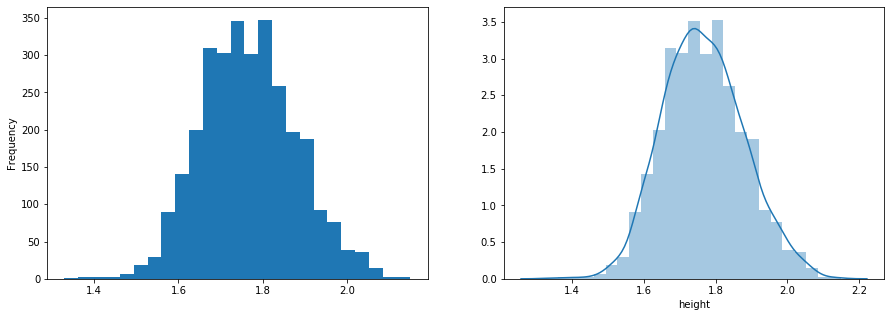

In [11]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
a.plot.hist(bins = 25)

plt.subplot(1, 2, 2)
sns.distplot(a,bins=25)
# isso parece muito gaussiano mas os testes dizem que nao com 95% de confianca

((array([-3.50184707, -3.25811987, -3.12333914, ...,  3.12333914,
          3.25811987,  3.50184707]),
  array([1.33, 1.37, 1.38, ..., 2.11, 2.13, 2.15])),
 (0.11228392813612549, 1.7667799999999998, 0.9980655667713959))

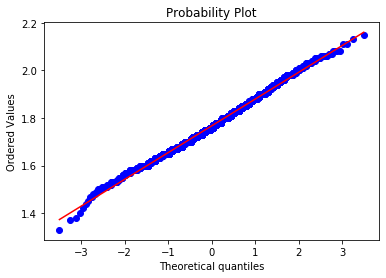

In [12]:
import pylab
sct.probplot(a, dist="norm", plot=pylab)

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [13]:
a = get_sample(athletes, 'height', n=3000)
sct.jarque_bera(sct.zscore(a))

(13.03363513594273, 0.001478366424594868)

In [14]:
def q2():
    alpha = 0.05
    a = get_sample(athletes, 'height', n=3000)
    if(sct.jarque_bera(sct.zscore(a))[1]<=alpha):
        return False 
    else: 
        return True

In [15]:
q2()

False

__Para refletir__:

* Esse resultado faz sentido?

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [16]:
a = get_sample(athletes, 'weight', n=3000)
sct.normaltest(a)


NormaltestResult(statistic=510.24655809881176, pvalue=1.5898922918029537e-111)

In [17]:
def q3():
    alpha = 0.05
    a = get_sample(athletes, 'weight', n=3000)
    if(sct.normaltest(a)[1]<=alpha):
        return False 
    else: 
        return True

In [18]:
q3()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

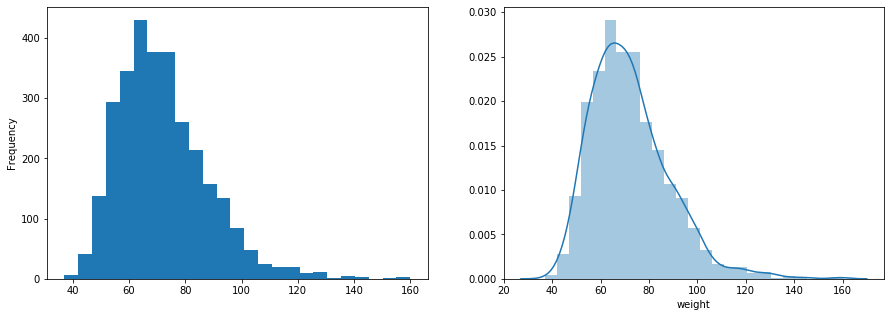

In [19]:
a = get_sample(athletes, 'weight', n=3000)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
a.plot.hist(bins = 25)

plt.subplot(1, 2, 2)
sns.distplot(a,bins=25)
# nitidamente isso nao e gaussiano

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [20]:
a = get_sample(athletes, 'weight', n=3000)
a = np.log(a)
sct.normaltest(a)


NormaltestResult(statistic=45.91534331977353, pvalue=1.0705572101256944e-10)

In [21]:
def q4():
    alpha = 0.05
    a = get_sample(athletes, 'weight', n=3000)
    a = np.log(a)
    if(sct.normaltest(a)[1]<=alpha):
        return False 
    else: 
        return True

In [22]:
q4()

False

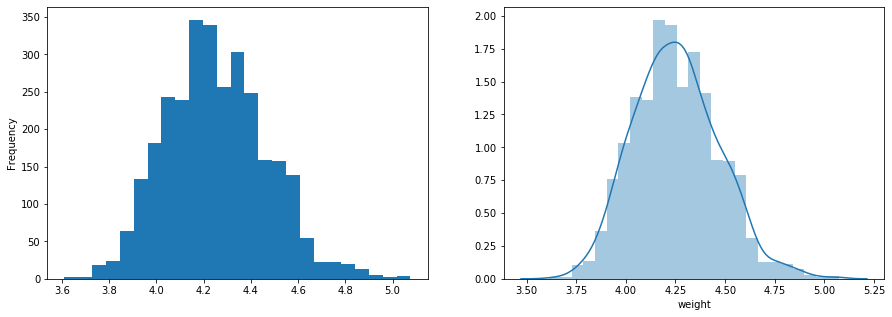

In [23]:
a = get_sample(athletes, 'weight', n=3000)
a = np.log(a)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
a.plot.hist(bins = 25)

plt.subplot(1, 2, 2)
sns.distplot(a,bins=25)
# nitidamente isso nao e gaussiano

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [24]:
athletesFiltered = athletes[athletes['nationality'].isin(['BRA','USA','CAN'])]

In [25]:
amostra1 = get_sample(athletes[athletes['nationality']=='BRA'], 'height', n=400)
amostra2 = get_sample(athletes[athletes['nationality']=='USA'], 'height', n=400)

sct.ttest_ind(amostra1,amostra2)

Ttest_indResult(statistic=-2.709700044571085, pvalue=0.006878878960334365)

In [38]:
def q5():
    alpha = 0.05
    amostra1 = get_sample(athletes[athletes['nationality']=='BRA'], 'height', n=400)
    amostra2 = get_sample(athletes[athletes['nationality']=='USA'], 'height', n=400)
    a = sct.ttest_ind(amostra1,amostra2)
    
    if(a[1]<=alpha):
        return False 
    else: 
        return True

In [39]:
q5()

False

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [44]:
def q6():
    alpha = 0.05
    amostra1 = get_sample(athletes[athletes['nationality']=='BRA'], 'height', n=300)
    amostra2 = get_sample(athletes[athletes['nationality']=='CAN'], 'height', n=300)
    a = sct.ttest_ind(amostra1,amostra2)
    
    if(a[1]<=alpha):
        return False 
    else: 
        return True

In [45]:
q6()

True

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [83]:
def q7():
    alpha = 0.05
    amostra1 = get_sample(athletes[athletes['nationality']=='USA'], 'height', n=300)
    amostra2 = get_sample(athletes[athletes['nationality']=='CAN'], 'height', n=300)
    
    a = sct.ttest_ind(amostra1,amostra2)
 
    return (float(round(a[1],8)))

In [84]:
q7()


0.00393474

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?